In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle

def load_datasets(datasets_name="digits"):
    if datasets_name == "iris":
        dataset = datasets.load_iris()
    elif datasets_name == "wine":
        dataset = datasets.load_wine()
    elif datasets_name == "digits":
        dataset = datasets.load_digits()

    X = dataset.data
    y = dataset.target

    y_ = y.reshape(-1, 1) # Convert data to a single column

    # One Hot encode the class labels
    encoder = OneHotEncoder(sparse=False)
    encoder.fit(y_)
    y = encoder.transform(y_)
    print(encoder.categories_)
    print(len(encoder.categories_[0]))
    # Split the data for training and testing
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    return x_train, x_test, y_train, y_test

def saveReport(accuracy_history):
    data = {
        "accuracy_history": accuracy_history
    }
    pickle.dump(data, open("./BP_report.pkl", "wb"))

x_train, x_test, y_train, y_test = load_datasets()

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]
10


Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 20)                1300      
_________________________________________________________________
output (Dense)               (None, 10)                210       
Total params: 1,510
Trainable params: 1,510
Non-trainable params: 0
_________________________________________________________________
None
X Train Shape (1437, 64)
X Train Elemn [ 0.  0.  3. 14.  1.  0.  0.  0.  0.  0. 12. 12.  0.  0.  0.  0.  0.  3.
 16.  6.  0.  0.  0.  0.  0.  5. 16.  2.  0.  0.  0.  0.  0.  6. 16.  2.
  5.  2.  0.  0.  0.  4. 16.  2. 12. 15.  2.  0.  0.  1. 14. 13.  2. 13.
 11.  0.  0.  0.  3. 11. 16. 13.  4.  0.]
Y Train Shape: (1437, 10)
Y Train Elemn: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Input Shape: (None, 64)
Epoch 1/1000
288/288 - 1s - loss: 1.0809 - accuracy: 0.7008
Epoch 2/1000
288/288 - 

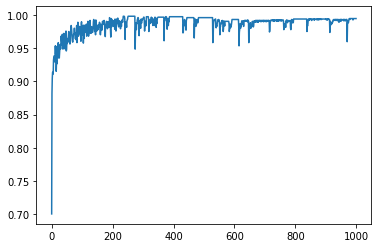

In [4]:
# Build the model

model = Sequential()

model.add(Dense(20, input_shape=(x_train[0].shape[0],), activation='relu', name='fc1'))
model.add(Dense(y_train[0].shape[0], activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.01)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
print("X Train Shape",x_train.shape)
print("X Train Elemn",x_train[0])
print("Y Train Shape:",y_train.shape)
print("Y Train Elemn:",y_train[0])
print("Input Shape:", model.input.shape)
train_history = model.fit(x_train, y_train, verbose=2, batch_size=5, epochs=1000)

plt.plot(train_history.history["accuracy"])
plt.show(block=False)

12/12 [==============================] - 0s 2ms/step - loss: 11.2689 - accuracy: 0.9444
Evaluating Model Using test splits dataset
Final test set loss: 11.268889
Final test set accuracy: 0.944444
Model input: (None, 64)
Example Prediction from test split: 


C:\Users\johan\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  del sys.path[0]


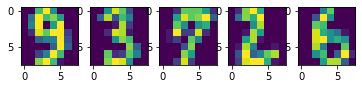

In [5]:
# Test on unseen data

results = model.evaluate(x_test, y_test)

print("Evaluating Model Using test splits dataset")
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))


print("Model input:", model.input.shape)
print('Example Prediction from test split: ')
for idx, x in enumerate(zip(x_test[:5], y_test[:5])):
    plt.subplot("15{}".format(idx))
    pred = model.predict(np.array([x[0]]))
    # pred = le.inverse_transform(pred)
    # truth = le.inverse_transform([x[1]])
    # plt.title("{}:{}".format(truth[0], pred[0]))
    plt.imshow(np.array(x[0]).reshape((8,8,1)))
plt.show(block=False)

saveReport(train_history.history["accuracy"])
